# Q4 Groceries_dataset

In [1]:
import warnings  
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from ydata_profiling import ProfileReport

from apyori import apriori

sns.set(color_codes=True)
sns.set_style('darkgrid')
%matplotlib inline 

In [2]:
df = pd.read_csv('Q4Groceries_dataset.csv')

In [ ]:
# !pip install apyori

In [ ]:
# pip install ydata-profiling

In [ ]:
# !pip install missingno

In [ ]:
ProfileReport(df)

## Data Wrangling

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


There are no missing values. 



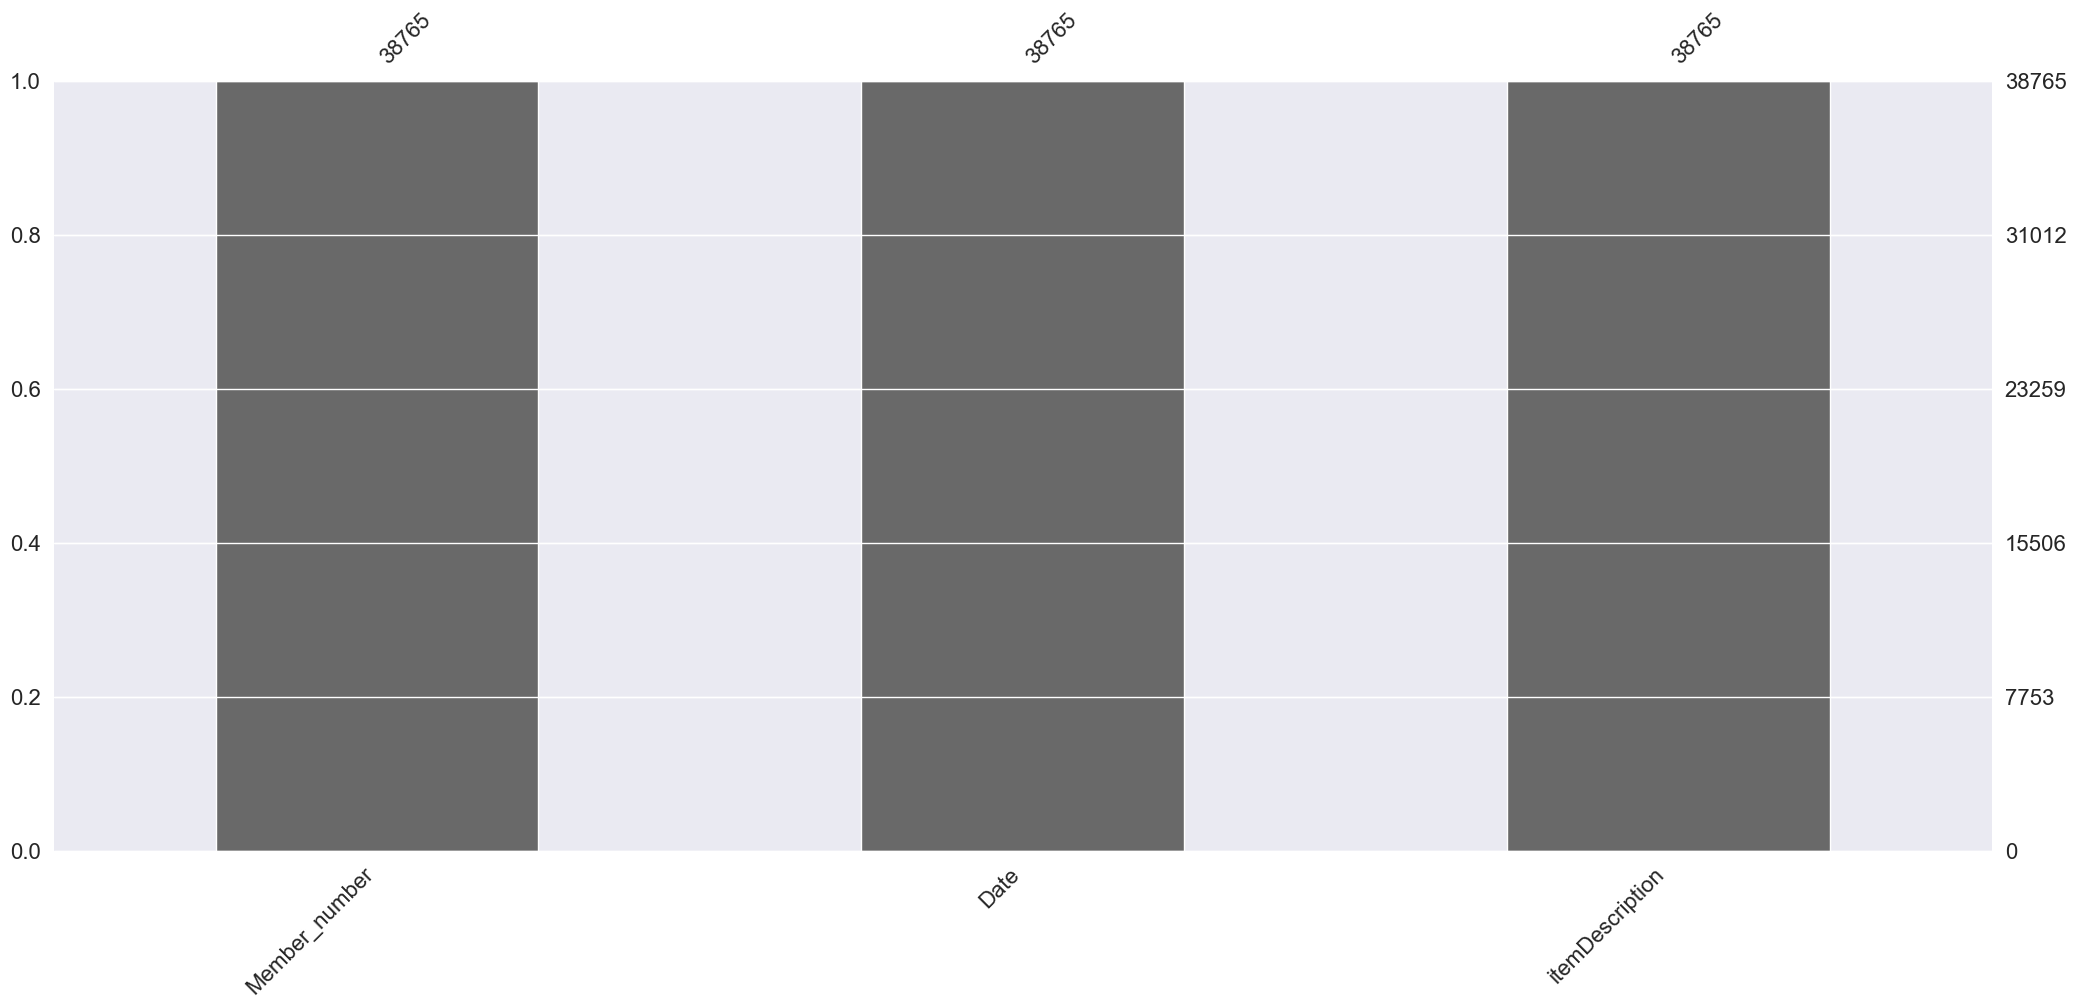

In [6]:
# Checking for missing values

print('There are no missing values.','\n')
ax = msno.bar(df)

In [7]:
print('Columns:\n\n',df.columns)

Columns:

 Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


# EDA

###### Unique occurrences of groceries

In [8]:
unique_groceries = df['itemDescription'].unique()
count_unique_groceries = len(unique_groceries)

print(f'Unique occurrences of groceries: {count_unique_groceries}','\n')
print(unique_groceries)

Unique occurrences of groceries: 167 

['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'


###### Top 30 Best-Selling Items

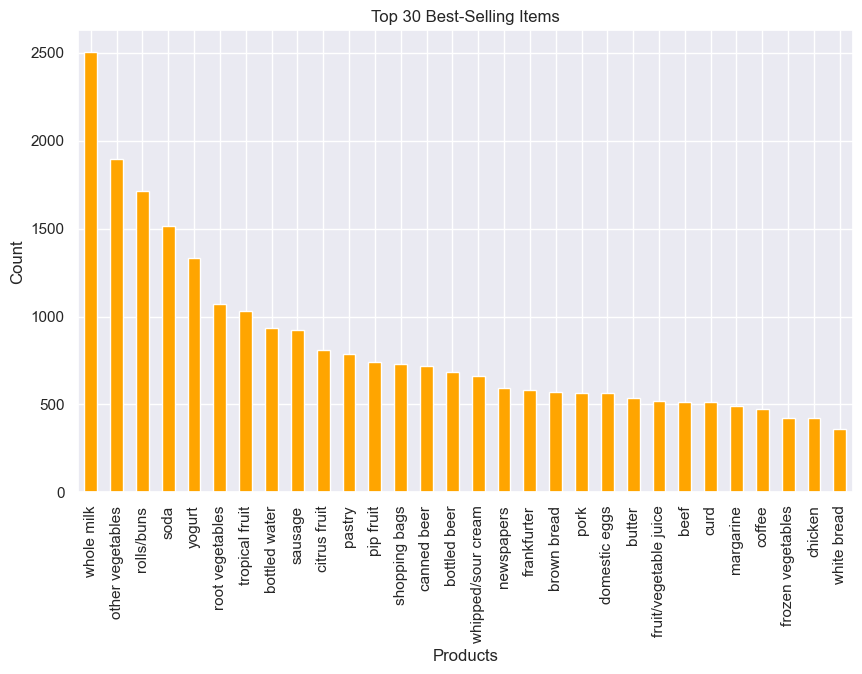

In [9]:
plt.figure(figsize=(10, 6))

top30_products = df['itemDescription'].value_counts().head(30)
top30_products.plot(kind='bar', color='Orange')

plt.title('Top 30 Best-Selling Items')
plt.ylabel('Count')
plt.xlabel('Products');

###### Top 30 Unpopular Items

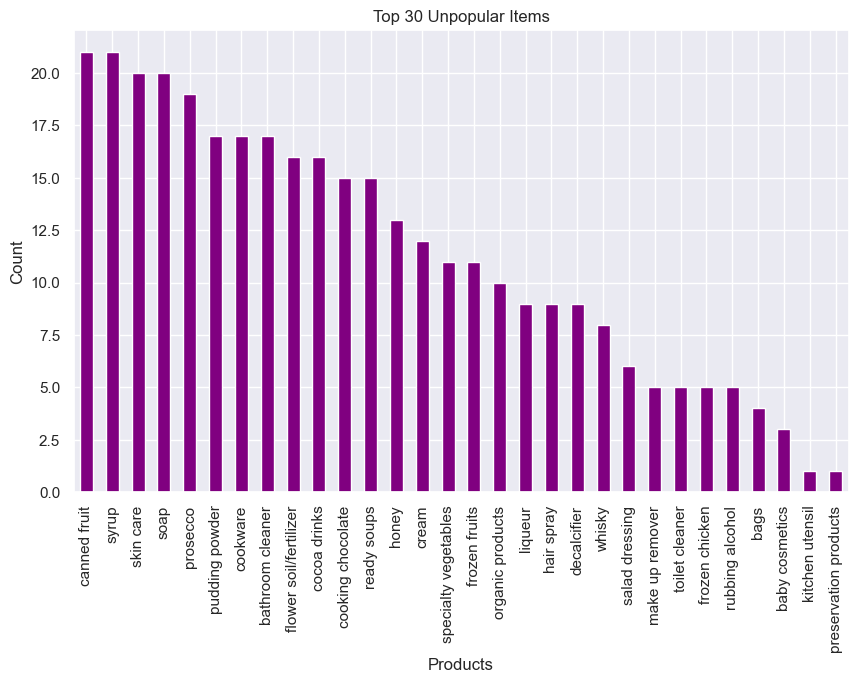

In [10]:
plt.figure(figsize=(10, 6))

top30_products = df['itemDescription'].value_counts().tail(30)
top30_products.plot(kind='bar', color='Purple')

plt.title('Top 30 Unpopular Items')
plt.ylabel('Count')
plt.xlabel('Products');

# Market Basket Analysis

In [11]:
# Selecting only required variables for modelling

items_per_member = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = True) 
items_per_member

,Member_number,itemDescription
1629,1000,soda
13331,1000,whole milk
8395,1000,whole milk
4843,1000,sausage
17778,1000,pickled vegetables
...,...,...
34885,5000,semi-finished bread
25489,5000,other vegetables
9340,5000,bottled beer
27877,5000,onions


In [14]:
# Combine all the items for each customer into a list format.

transactions = items_per_member.groupby('Member_number')['itemDescription'].apply(list).tolist()
transactions

[['soda',
  'whole milk',
  'whole milk',
  'sausage',
  'pickled vegetables',
  'canned beer',
  'yogurt',
  'misc. beverages',
  'salty snack',
  'sausage',
  'semi-finished bread',
  'hygiene articles',
  'pastry'],
 ['whole milk',
  'sausage',
  'curd',
  'soda',
  'beef',
  'frankfurter',
  'white bread',
  'frankfurter',
  'whipped/sour cream',
  'rolls/buns',
  'whole milk',
  'soda'],
 ['other vegetables',
  'frozen vegetables',
  'specialty chocolate',
  'sugar',
  'butter',
  'whole milk',
  'tropical fruit',
  'butter milk'],
 ['rolls/buns',
  'dental care',
  'detergent',
  'sausage',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'root vegetables'],
 ['whole milk',
  'packaged fruit/vegetables',
  'whole milk',
  'canned beer',
  'chocolate',
  'dish cleaner',
  'shopping bags',
  'other vegetables',
  'pip fruit',
  'red/blush wine',
  'root vegetables',
  'whole milk',
  'frozen fish',
  'hygiene articles',
  'pastry',
  'chocolate',
  'rolls/buns',
  'other vegetab

In [15]:
# Training Apriori model on the dataset

rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.02, min_lift = 3, 
                min_length = 2, max_length = 2) # 2 products to the rught and 2 products to the left
                                                # how the client behaviour buys this 2 products together 

In [16]:
results = list(rules)
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'UHT-milk'}), items_add=frozenset({'kitchen towels'}), confidence=0.029411764705882356, lift=3.821568627450981), OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'potato products'}), confidence=0.02145922746781116, lift=3.8021849395239955), OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), i

In [17]:
# Putting the results well organised into a Pandas Data Frame

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results] # two items on the left hand
    rhs         = [tuple(result[2][0][1])[0] for result in results] # two items on the right hand
    supports    = [result[1] for result in results] # we want to see the results in first place
    confidences = [result[2][0][2] for result in results] # Confidence in place Nº2
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 
                                                               'Support', 'Confidence', 'Lift'])

In [18]:
# Displaying non sorted results

resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,UHT-milk,kitchen towels,0.002309,0.029412,3.821569
1,beef,potato products,0.002565,0.021459,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
3,domestic eggs,meat spreads,0.003592,0.026975,3.004239
4,flour,mayonnaise,0.002309,0.063380,3.338599
5,napkins,rice,0.003079,0.037855,3.011395
6,sparkling wine,waffles,0.002565,0.217391,3.150154


In [19]:
# Displaying the results sorted by descending lifts

resultsinDataFrame.nlargest(n = 8, columns = 'Lift') # Checking the best combination

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,UHT-milk,kitchen towels,0.002309,0.029412,3.821569
1,beef,potato products,0.002565,0.021459,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
4,flour,mayonnaise,0.002309,0.063380,3.338599
6,sparkling wine,waffles,0.002565,0.217391,3.150154
5,napkins,rice,0.003079,0.037855,3.011395
3,domestic eggs,meat spreads,0.003592,0.026975,3.004239
